In [1]:
pip install --user qastle func_adl 'awkward>=1' 'uproot>=4'

  Using cached https://files.pythonhosted.org/packages/99/5d/a0fea22dccda14bb0ecfc6b553cd1225b164064161bab6c65c0c9c0a9bd2/awkward-1.1.2-cp38-cp38-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6e/4d/299e38a302212a1f4cb4ec97f9daf2ee6cd834713d7ce231229c569e0375/uproot-4.0.4-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.path.insert(0, '/eos/home-m/mproffit/.local/lib/python3.8/site-packages')
sys.path.insert(0, '/eos/user/m/mproffit/src/func_adl_uproot')

In [3]:
from func_adl_uproot import UprootDataset
import matplotlib.pyplot as plt

## 1. Plot the missing $E_\textrm{T}$ of all events.

In [4]:
ds = UprootDataset('/eos/user/m/mproffit/Run2012B_SingleMu.root')

In [5]:
missing_ET = ds.Select(lambda event: event.MET_pt).value()

In [6]:
missing_ET

<Array [22.2, 13.9, 15, ... 19.8, 19.9, 46.6] type='53446198 * float32'>

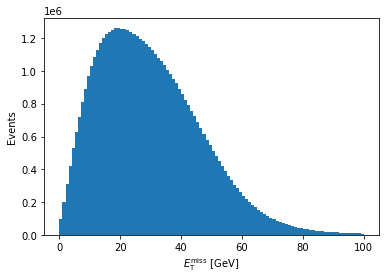

In [7]:
plt.hist([missing_ET], bins=100, range=(0, 100))
plt.xlabel(r'$E_\mathrm{T}^\mathrm{miss}$ [GeV]')
plt.ylabel('Events')
plt.show()

## 2. Plot $p_\textrm{T}$ of all jets in all events.

In [8]:
jet_pT = ds.SelectMany(lambda event: event.Jet_pt).value()

In [9]:
jet_pT

<Array [71.7, 27.8, 23.2, ... 19.9, 15.3, 17] type='170952895 * float32'>

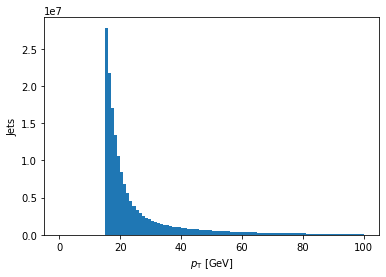

In [10]:
plt.hist([jet_pT], bins=100, range=(0, 100))
plt.xlabel(r'$p_\mathrm{T}$ [GeV]')
plt.ylabel('Jets')
plt.show()

## 3. Plot $p_\textrm{T}$ of jets with $|\eta| < 1$.

In [11]:
filtered_jet_pT = ds.SelectMany(lambda event: Zip({'pT': event.Jet_pt, 'eta': event.Jet_eta}).Where(lambda jet: abs(jet.eta) < 1).Select(lambda jet: jet.pT)).value()

In [12]:
filtered_jet_pT

<Array [27.8, 17.4, 33.7, ... 66.2, 22.1, 15.3] type='39563735 * float32'>

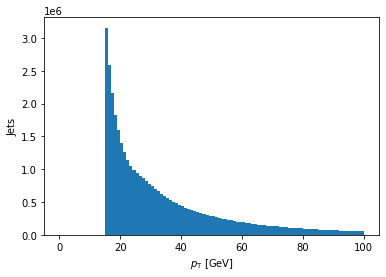

In [13]:
plt.hist([filtered_jet_pT], bins=100, range=(0, 100))
plt.xlabel(r'$p_\mathrm{T}$ [GeV]')
plt.ylabel('Jets')
plt.show()

## 4. Plot the missing $E_\textrm{T}$ of events that have at least two jets with $p_\textrm{T} > 40 \textrm{ GeV}$.

In [14]:
filtered_missing_ET = ds.Where(lambda event: event.Jet_pt.Where(lambda pT: pT > 40).Count() >= 2).Select(lambda event: event.MET_pt).value()

In [15]:
filtered_missing_ET

<Array [15, 44.7, 30.5, ... 123, 30.3, 20.4] type='6665702 * float32'>

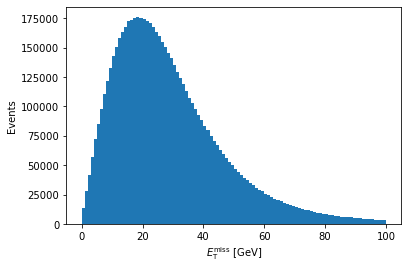

In [16]:
plt.hist([filtered_missing_ET], bins=100, range=(0, 100))
plt.xlabel(r'$E_\mathrm{T}^\mathrm{miss}$ [GeV]')
plt.ylabel('Events')
plt.show()